In [209]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pingouin
import xlrd

In [205]:
df = pd.read_excel('usregsoldbyprice_cust.xls')
df.head(10)

,"New Houses Sold in the United States, by Sales Price",Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Annual Data,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,[Thousands of houses. Components may not add ...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,Period,Total,Under,"$125,000 to","$150,000 to","$200,000 to","$250,000 to","$300,000 to","$400,000 to","$500,000 to","$750,000"
6,NaN,NaN,"$125,000","$149,999","$199,999","$249,999","$299,999","$399,999","$499,999","$749,999",and over
7,2002,973,157,138,237,139,107,106,47,31,12
8,2003,1086,150,146,264,148,112,142,56,51,17
9,2004,1203,133,137,254,181,131,165,90,82,31


In [206]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26 entries, 0 to 25
Data columns (total 11 columns):
 #   Column                                                 Non-Null Count  Dtype 
---  ------                                                 --------------  ----- 
 0    New Houses Sold in the United States, by Sales Price  22 non-null     object
 1   Unnamed: 1                                             20 non-null     object
 2   Unnamed: 2                                             21 non-null     object
 3   Unnamed: 3                                             21 non-null     object
 4   Unnamed: 4                                             21 non-null     object
 5   Unnamed: 5                                             21 non-null     object
 6   Unnamed: 6                                             21 non-null     object
 7   Unnamed: 7                                             21 non-null     object
 8   Unnamed: 8                                             21 non-

In [211]:
#dropping the NaN values from the dataFrame
us_sold = df.dropna()
us_sold = us_sold.drop([5])
us_sold

,"New Houses Sold in the United States, by Sales Price",Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10
7,2002,973,157,138,237,139,107,106,47,31,12
8,2003,1086,150,146,264,148,112,142,56,51,17
9,2004,1203,133,137,254,181,131,165,90,82,31
10,2005,1283,104,122,246,200,152,203,111,99,45
11,2006,1051,64,97,208,162,138,174,84,80,43
12,2007,776,38,68,162,125,102,121,65,62,32
13,2008,485,31,46,106,86,63,69,35,31,18
14,2009,375,25,41,96,66,48,46,23,20,10
15,2010,323,19,36,79,54,43,44,21,18,8
16,2011,306,19,31,68,59,40,46,20,17,6


In [212]:
#renaming columns & setting index to Time Period (Year)
us_sold.columns = ['Year', 'Total Homes Sold', "<$125,000", "<$149,999", "<$199,999", "<$249,999", "<$299,999", "<$399,999", "<$499,999", "<$749,999", ">$750,000"]
us_sold.set_index(['Year'])

,Total Homes Sold,"<$125,000","<$149,999","<$199,999","<$249,999","<$299,999","<$399,999","<$499,999","<$749,999",">$750,000"
Year,,,,,,,,,,
2002,973,157,138,237,139,107,106,47,31,12
2003,1086,150,146,264,148,112,142,56,51,17
2004,1203,133,137,254,181,131,165,90,82,31
2005,1283,104,122,246,200,152,203,111,99,45
2006,1051,64,97,208,162,138,174,84,80,43
2007,776,38,68,162,125,102,121,65,62,32
2008,485,31,46,106,86,63,69,35,31,18
2009,375,25,41,96,66,48,46,23,20,10
2010,323,19,36,79,54,43,44,21,18,8


In [213]:
#convert Year column into dateTime format
us_sold["Year"] = pd.to_datetime(us_sold['Year'], format = '%Y')
us_sold['Total Homes Sold'] = us_sold['Total Homes Sold'].astype(int)
us_sold['<$125,000'] = us_sold['<$125,000'].astype(int)
us_sold['<$149,999'] = us_sold['<$149,999'].astype(int)
us_sold['<$199,999'] = us_sold['<$199,999'].astype(int)
us_sold['<$249,999'] = us_sold['<$249,999'].astype(int)
us_sold['<$299,999'] = us_sold['<$299,999'].astype(int)
us_sold['<$399,999'] = us_sold['<$399,999'].astype(int)
us_sold['<$499,999'] = us_sold['<$499,999'].astype(int)
us_sold['<$749,999'] = us_sold['<$749,999'].astype(int)
us_sold['>$750,000'] = us_sold['>$750,000'].astype(int)
us_sold.set_index(['Year'])

,Total Homes Sold,"<$125,000","<$149,999","<$199,999","<$249,999","<$299,999","<$399,999","<$499,999","<$749,999",">$750,000"
Year,,,,,,,,,,
2002-01-01,973,157,138,237,139,107,106,47,31,12
2003-01-01,1086,150,146,264,148,112,142,56,51,17
2004-01-01,1203,133,137,254,181,131,165,90,82,31
2005-01-01,1283,104,122,246,200,152,203,111,99,45
2006-01-01,1051,64,97,208,162,138,174,84,80,43
2007-01-01,776,38,68,162,125,102,121,65,62,32
2008-01-01,485,31,46,106,86,63,69,35,31,18
2009-01-01,375,25,41,96,66,48,46,23,20,10
2010-01-01,323,19,36,79,54,43,44,21,18,8


In [214]:
us_sold.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 19 entries, 7 to 25
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   Year              19 non-null     datetime64[ns]
 1   Total Homes Sold  19 non-null     int64         
 2   <$125,000         19 non-null     int64         
 3   <$149,999         19 non-null     int64         
 4   <$199,999         19 non-null     int64         
 5   <$249,999         19 non-null     int64         
 6   <$299,999         19 non-null     int64         
 7   <$399,999         19 non-null     int64         
 8   <$499,999         19 non-null     int64         
 9   <$749,999         19 non-null     int64         
 10  >$750,000         19 non-null     int64         
dtypes: datetime64[ns](1), int64(10)
memory usage: 1.8 KB


<AxesSubplot:xlabel='Year', ylabel='Total Homes Sold'>

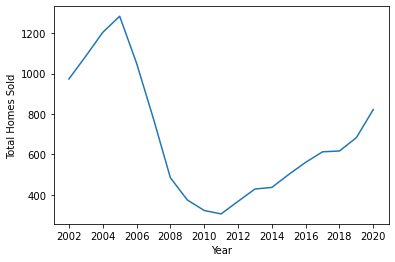

In [223]:
sns.lineplot(data = us_sold, x = 'Year', y ='Total Homes Sold')

<AxesSubplot:xlabel='Year', ylabel='<$125,000'>

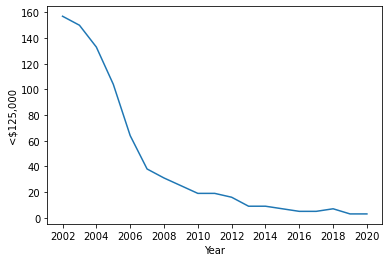

In [224]:
sns.lineplot(data = us_sold, x = 'Year', y = '<$125,000')

<AxesSubplot:xlabel='Year', ylabel='>$750,000'>

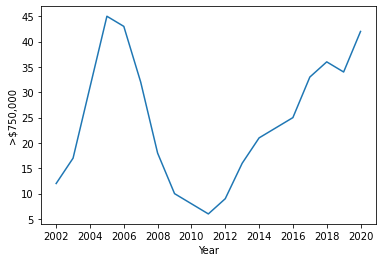

In [226]:
sns.lineplot(data = us_sold, x= 'Year', y = '>$750,000')